## EDA of Avengers box office data

In this notebook, I'm going to scrape box office data about all four of Marvel's Avengers movies from [boxofficemojo.com](boxofficemojo.com)

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
url = "https://www.boxofficemojo.com/release/rl709199361/?ref_=bo_tt_gr_1"

av1 = pd.read_html(requests.get(url).content)[0]
print(av1.head())
print('-----------')
print(av1.tail())

          Date       DOW  Rank        Daily   %± YD %± LW  Theaters      Avg  \
0  May 4, 2012    Friday     1  $80,813,985       -     -      4349  $18,582   
1  May 5, 2012  Saturday     1  $69,557,990  -13.9%     -      4349  $15,994   
2  May 6, 2012    Sunday     1  $57,066,733    -18%     -      4349  $13,121   
3  May 7, 2012    Monday     1  $18,898,999  -66.9%     -      4349   $4,345   
4  May 8, 2012   Tuesday     1  $17,677,190   -6.5%     -      4349   $4,064   

        To Date  Day  Estimated  
0   $80,813,985    1      False  
1  $150,371,975    2      False  
2  $207,438,708    3      False  
3  $226,337,707    4      False  
4  $244,014,897    5      False  
-----------
            Date        DOW  Rank     Daily   %± YD   %± LW  Theaters   Avg  \
93   Sep 9, 2012     Sunday    20  $163,107  -59.8%  -80.6%      1209  $134   
94  Sep 10, 2012     Monday    18   $46,138  -71.7%  -91.8%      1209   $38   
95  Sep 11, 2012    Tuesday    17   $56,594  +22.7%  -53.5%      1

Terrific, the code worked and I have a gorgeous dataframe containing all of the info I need. Let's get the others

In [12]:
# avengers 2
url = "https://www.boxofficemojo.com/release/rl675644929/?ref_=bo_tt_gr_1"
av2 = pd.read_html(requests.get(url).content)[0]

# avengers 3
url = "https://www.boxofficemojo.com/release/rl3043198465/?ref_=bo_tt_gr_1"
av3 = pd.read_html(requests.get(url).content)[0]

# avengers 4
url = "https://www.boxofficemojo.com/release/rl3059975681/?ref_=bo_rl_tab#tabs"
av4 = pd.read_html(requests.get(url).content)[0]

In [45]:
print(av1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
Date         98 non-null object
DOW          98 non-null object
Rank         98 non-null int64
Daily        98 non-null object
%± YD        98 non-null object
%± LW        98 non-null object
Theaters     98 non-null int64
Avg          98 non-null object
To Date      98 non-null object
Day          98 non-null int64
Estimated    98 non-null bool
dtypes: bool(1), int64(3), object(7)
memory usage: 7.8+ KB
None


We need to convert the 'To Date' column to float

In [47]:
av1['To Date'] = av1[av1.columns[8]].replace('[\$,]', '', regex=True).astype(float)

av1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
Date         98 non-null object
DOW          98 non-null object
Rank         98 non-null int64
Daily        98 non-null object
%± YD        98 non-null object
%± LW        98 non-null object
Theaters     98 non-null int64
Avg          98 non-null object
To Date      98 non-null float64
Day          98 non-null int64
Estimated    98 non-null bool
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 7.8+ KB


Great, now to fix the others

In [48]:
av2['To Date'] = av2[av2.columns[8]].replace('[\$,]', '', regex=True).astype(float)
av3['To Date'] = av3[av3.columns[8]].replace('[\$,]', '', regex=True).astype(float)
av4['To Date'] = av4[av4.columns[8]].replace('[\$,]', '', regex=True).astype(float)

Let's plot some of this out

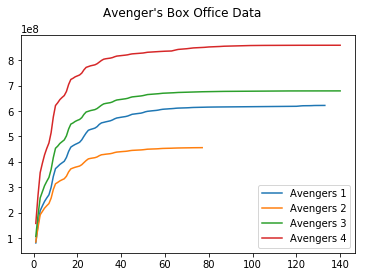

In [49]:
fig, ax = plt.subplots()

ax.plot(av1['Day'], av1['To Date'],label='Avengers 1')
ax.plot(av2['Day'], av2['To Date'],label='Avengers 2')
ax.plot(av3['Day'], av3['To Date'],label='Avengers 3')
ax.plot(av4['Day'], av4['To Date'],label='Avengers 4')
ax.legend()



fig.suptitle('Avenger\'s Box Office Data')
plt.show()